In [5]:
import pandas as pd
df= pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set (style="whitegrid")

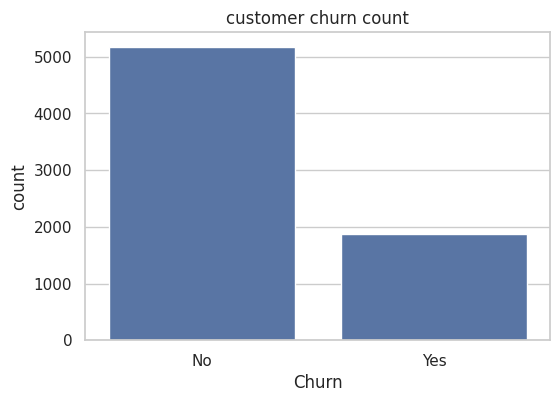

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("customer churn count")
plt.show()

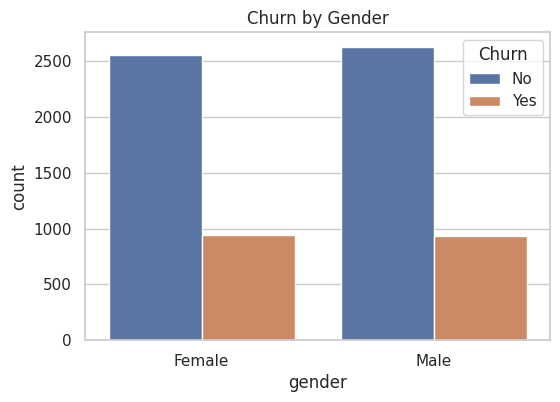

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

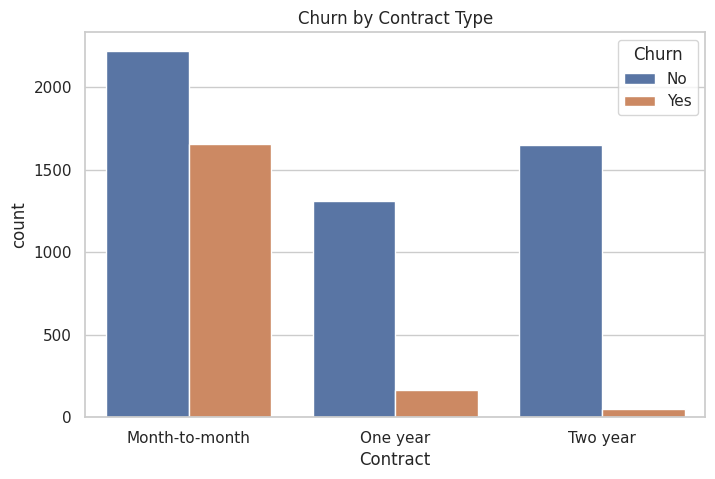

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

In [13]:
print(df['MonthlyCharges'].dtype)
print(df[['Churn', 'MonthlyCharges']].head(10))

float64
  Churn  MonthlyCharges
0    No           29.85
1    No           56.95
2   Yes           53.85
3    No           42.30
4   Yes           70.70
5   Yes           99.65
6    No           89.10
7    No           29.75
8   Yes          104.80
9    No           56.15


In [14]:
df = df.drop('customerID', axis=1)  # Just an ID, not useful for prediction

In [15]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')


In [17]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [18]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)  # All columns except the target
y = df['Churn']               # The target variable

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (5634, 6559)
Test shape: (1409, 6559)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings

# Train on training data
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8239886444286728

Confusion Matrix:
 [[939  97]
 [151 222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7977288857345636

Confusion Matrix:
 [[957  79]
 [206 167]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [21]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Combine names + importance, sort
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(15)


,Feature,Importance
1,tenure,0.114884
2,MonthlyCharges,0.091638
27,PaymentMethod_Electronic check,0.029478
9,InternetService_Fiber optic,0.024915
12,OnlineSecurity_Yes,0.024335
24,Contract_Two year,0.023617
18,TechSupport_Yes,0.021441
25,PaperlessBilling_Yes,0.019433
23,Contract_One year,0.019143
3,gender_Male,0.018593
